In [1]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

Using TensorFlow backend.


In [2]:
def show_gray_image(image):
    plt.imshow(rgb2lab(image)[:,:,0]*255/100, cmap='gray')

In [3]:
model = load_model('best_model_farm.h5')

In [4]:
try:
    with open('X_farm.pkl', 'rb') as handle:
        X = pickle.load(handle)
except:
    path = './unzipped_images/farm/'
    X = []
    for filename in os.listdir(path)[-500:]:
        X.append(img_to_array(load_img(path + filename))/255)
    X = np.array(X)
    with open('X_farm.pkl', 'wb') as handle:
        pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
X_lab = rgb2lab(X)

In [6]:
X_L = X_lab[:,:,:,0].reshape(X_lab[:,:,:,0].shape + (1,))
X_ab = X_lab[:,:,:,1:]

In [16]:
try:
    with open('recolored_farm.pkl', 'rb') as handle:
        recolored_images = pickle.load(handle)
    
except:
    predictions = model.predict(X_L/100, batch_size=8)
    
    recolored_images = []
    for image in np.concatenate([X_L, predictions*128], axis=-1):
        recolored_images.append(lab2rgb(image))
    recolored_images = np.array(recolored_images)
    with open('recolored_farm.pkl', 'wb') as handle:
        pickle.dump(recolored_images, handle, protocol=pickle.HIGHEST_PROTOCOL)

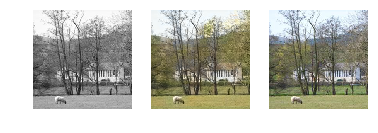

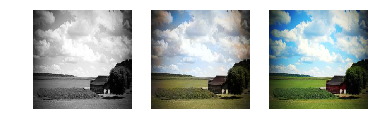

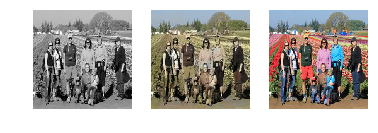

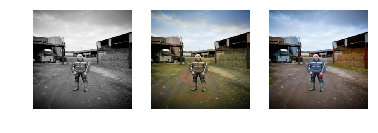

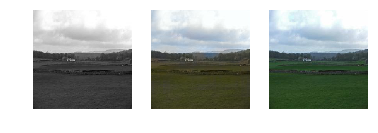

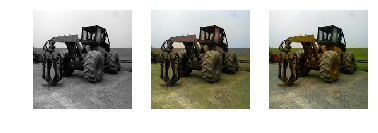

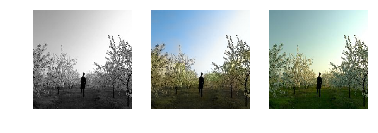

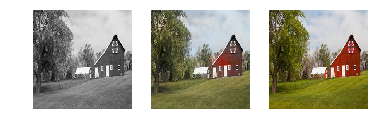

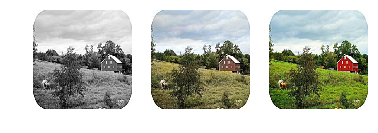

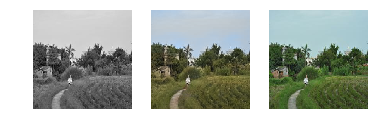

In [23]:
for i in range(10):
    fig = plt.figure()
    fig.add_subplot(131)
    plt.gca().axis('off')
    show_gray_image(X[i])
    fig.add_subplot(132)
    plt.gca().axis('off')
    plt.imshow(recolored_images[i])
    fig.add_subplot(133)
    plt.gca().axis('off')
    plt.imshow(X[i])
    plt.show()